*How do operational factors influence the need for overtime, and can we accurately predict overtime requirements?*

# Import necessary libraries

In [1]:
!pip install dataprep

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 45.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import warnings

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

warnings.filterwarnings("ignore")

# Data preparation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Loading the data

In [3]:
dataset_linkid = '18O3fTa9Vl_P6-XVgzvMrwUiY1ukwJItV'
dataset_link = f'https://drive.google.com/uc?export=download&id={dataset_linkid}'

df = pd.read_csv(dataset_link)

# Dataset Exploration

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
df.shape

(1197, 15)

*There are 1197 rows with 15 columns.*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### Check for duplicate rows in the dataset

In [7]:
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found in the dataset.")
else:
    print("Duplicate rows found in df_train:")
    print(duplicate_rows)

No duplicate rows found in the dataset.


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [9]:
df.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


*We can see there are 506 missing data in wip, which means Work in progress, that includes the number of unfinished items for products. There are no missing values for the other columns.*

In [10]:
# List of categorical columns
# Since `over_time` is our target variable, we are excluding it
categorical_columns = [col for col in df.columns if df.dtypes[col] == 'object' and col != 'over_time']

# List of numerical columns
numerical_columns = [col for col in df.columns if (df.dtypes[col] != 'object' and col != 'over_time')]

print('Numerical Features are : ',numerical_columns)
print('Categorical Features are : ',categorical_columns)

Numerical Features are :  ['team', 'targeted_productivity', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
Categorical Features are :  ['date', 'quarter', 'department', 'day']


In [11]:
print(df['department'].unique())
print(df['team'].unique())
print(df['day'].unique())
print(df['date'].unique())

['sweing' 'finishing ' 'finishing']
[ 8  1 11 12  6  7  2  3  9 10  5  4]
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']


# Data Analysis

In [12]:
df.columns

# Select important features relevant to reducing over_time
selected_columns = ['no_of_workers', 'targeted_productivity', 'smv', 'wip',
                    'over_time', 'idle_men', 'no_of_style_change']
df_selected = df[selected_columns]

df_selected.head()

,no_of_workers,targeted_productivity,smv,wip,over_time,idle_men,no_of_style_change
0,59.0,0.80,26.16,1108.0,7080,0,0
1,8.0,0.75,3.94,NaN,960,0,0
2,30.5,0.80,11.41,968.0,3660,0,0
3,30.5,0.80,11.41,968.0,3660,0,0
4,56.0,0.80,25.90,1170.0,1920,0,0


### Pairplot for selected numerical variables

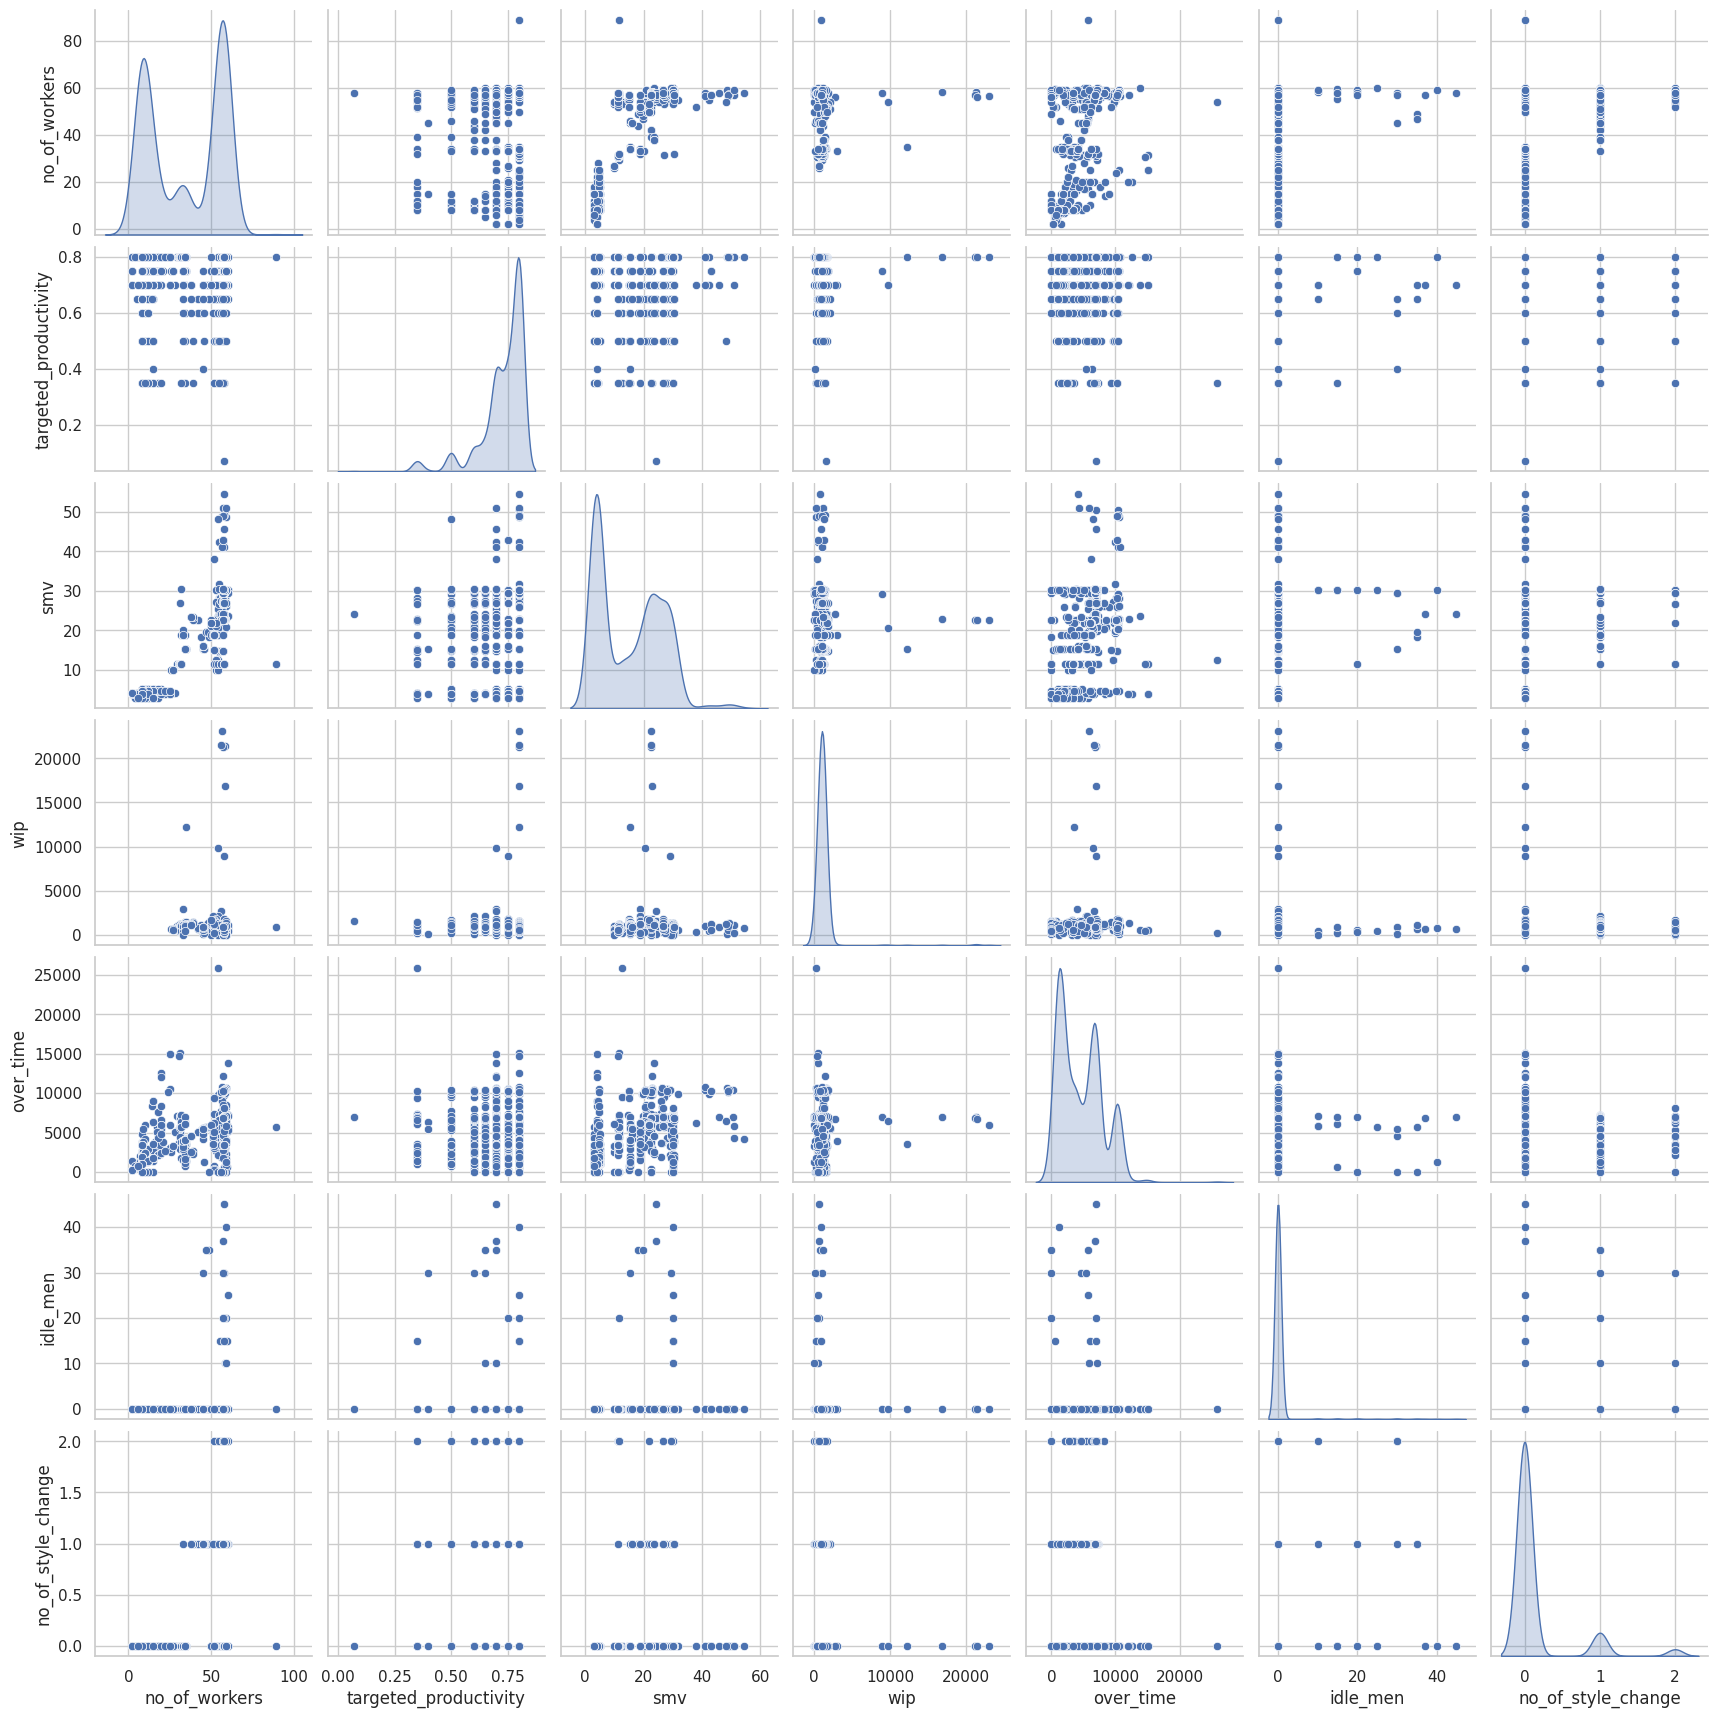

In [13]:
sns.pairplot(df_selected, diag_kind='kde', palette='husl')
plt.show()

- **no_of_workers**: There is some scattered correlation between the number of workers and overtime, indicating that teams with more workers tend to have longer overtime, though there’s no strong linear pattern.
- **targeted_productivity**: The distribution is heavily right-skewed, with most values clustered around 0.5-0.75. This suggests that most teams have targeted productivity around this range.
- **SMV (Standard Minute Value):** There seems to be a positive association between SMV and overtime, though it is somewhat scattered. This suggests that longer tasks tend to result in more overtime.
- **WIP (Work in Progress):** The distribution of WIP shows a right-skewed pattern, with most work-in-progress values being relatively low and a few instances where there is a very high amount of unfinished work.
- **over_time**:
  - Distribution: The distribution for overtime is highly skewed, with most teams having very little overtime and a few teams logging significant overtime hours.
  - Relationship with no_of_workers and SMV: As seen in the scatterplots, there’s a positive correlation between overtime and both "no_of_workers" and "SMV," suggesting that teams with more workers and higher SMV tend to work overtime more often.

*Skewed Distributions: Many of the variables, such as over_time, SMV, and idle_time, have skewed distributions, which might require transformations (like log or Box-Cox transformations) to improve predictive modeling.*

### Visualizing missing data

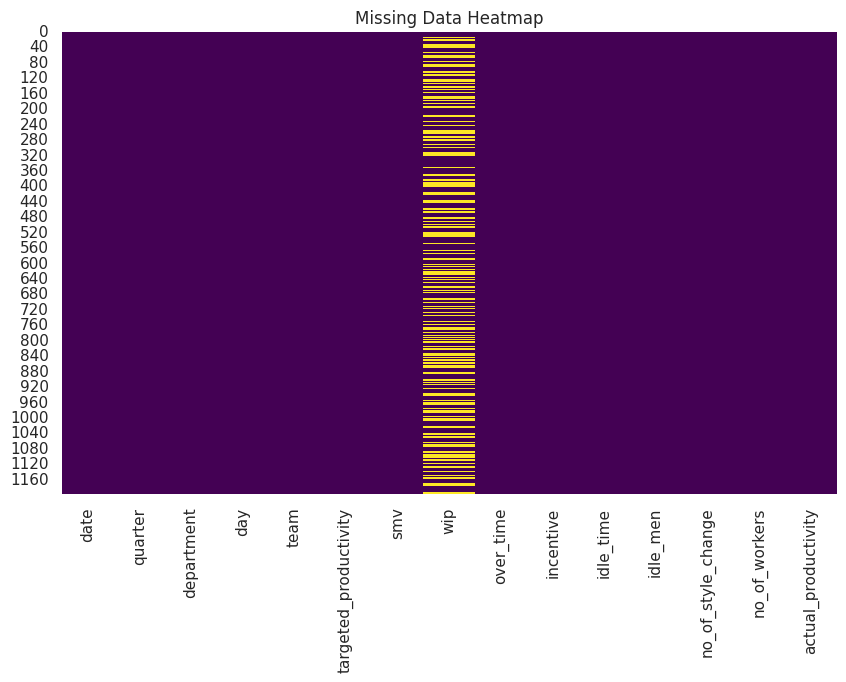

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

*WIP (Work in Progress) is the only feature with missing data.*

### Correlation Matrix of Numerical Features

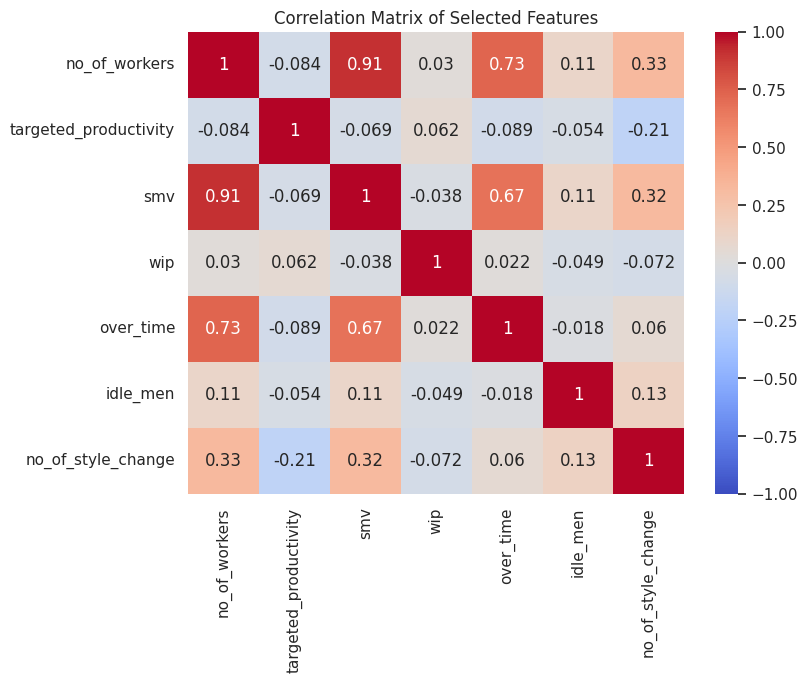

In [15]:
corr_matrix = df_selected.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()

- **Overtime Correlation**:
  - There is a strong positive correlation (0.73) between the number of workers and overtime, meaning that larger teams tend to require more overtime. This could suggest inefficiencies in managing larger teams, or it could be related to the complexity of tasks assigned to larger groups.
  - The SMV (0.67) also has a strong positive correlation with overtime. This suggests that more complex tasks (which require more time per unit) are associated with more overtime, confirming that task complexity is a significant factor in overtime.
- **Idle men and Over time:** There is a weak positive correlation between idle men (0.13) and overtime. While this is not very strong, it still points to the fact that interruptions in production (idle men due to production issues) could lead to increased overtime.
- **Team Size and SMV:** The number of workers and SMV are highly correlated (0.91), indicating that larger teams tend to work on more complex tasks. This might be due to management assigning more resources to tasks that are expected to take longer or have a higher degree of complexity.
- **Productivity and Overtime:** Interestingly, targeted productivity shows a negative correlation with overtime (-0.089), implying that teams with higher targeted productivity do not necessarily spend more time in overtime. This could suggest that teams with higher efficiency targets manage their time better, avoiding overtime.



# Explore Target Variable

### Distribution of over_time


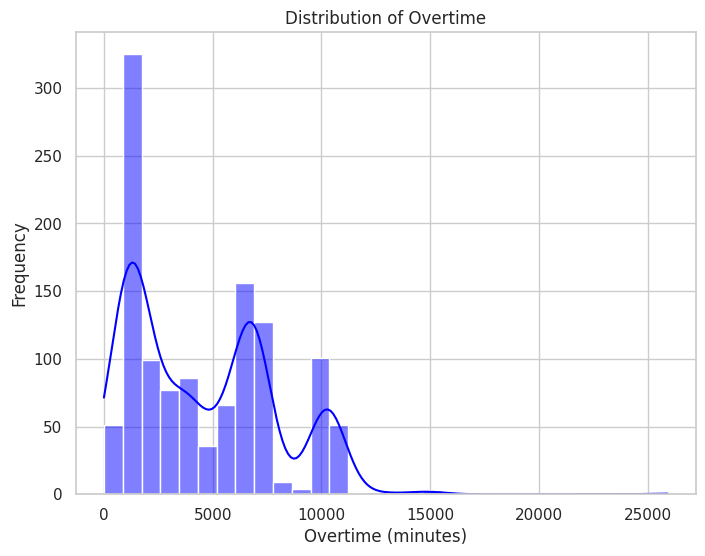

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(df['over_time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Overtime')
plt.xlabel('Overtime (minutes)')
plt.ylabel('Frequency')
plt.show()

*The data is heavily skewed to the right, meaning that most instances of overtime are concentrated at the lower end, with a small number of occurrences involving much higher overtime minutes. This suggests that while most teams experience relatively lower overtime, a few outliers have very high overtime.*

### Scatterplots

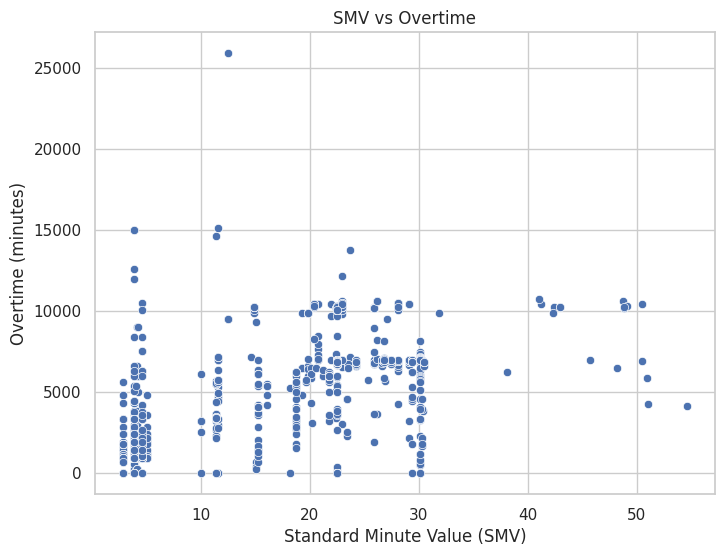

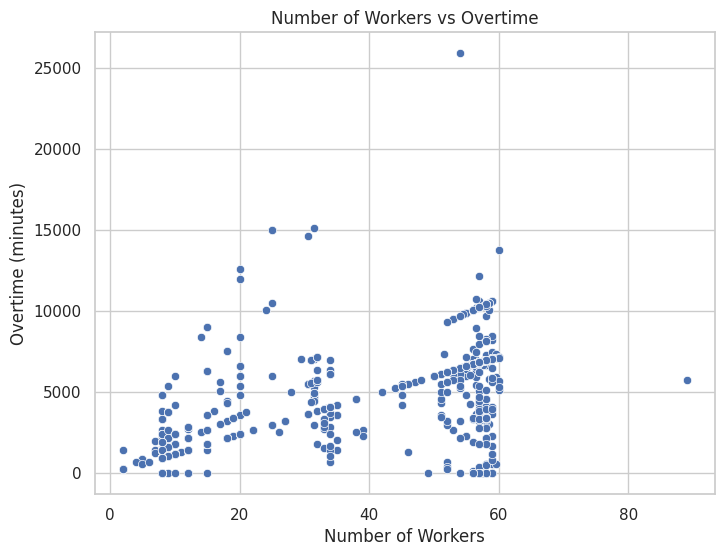

In [17]:
# Scatterplot for SMV vs over_time
plt.figure(figsize=(8,6))
sns.scatterplot(x='smv', y='over_time', data=df_selected)
plt.title('SMV vs Overtime')
plt.xlabel('Standard Minute Value (SMV)')
plt.ylabel('Overtime (minutes)')
plt.show()

# Scatterplot for WIP vs over_time
plt.figure(figsize=(8,6))
sns.scatterplot(x='no_of_workers', y='over_time', data=df_selected)
plt.title('Number of Workers vs Overtime')
plt.xlabel('Number of Workers')
plt.ylabel('Overtime (minutes)')
plt.show()

- A general trend is observable where tasks with higher SMV (above 20) seem to have slightly more overtime minutes. But this relationship is not very strong or consistent across the entire range.
- As the number of workers increases, there tends to be more overtime, especially for teams with 40 to 60 workers, indicating that teams in this range are more prone to higher overtime, possibly due to task complexity or team coordination challenges.

### Boxplot of over_time to check for outliers

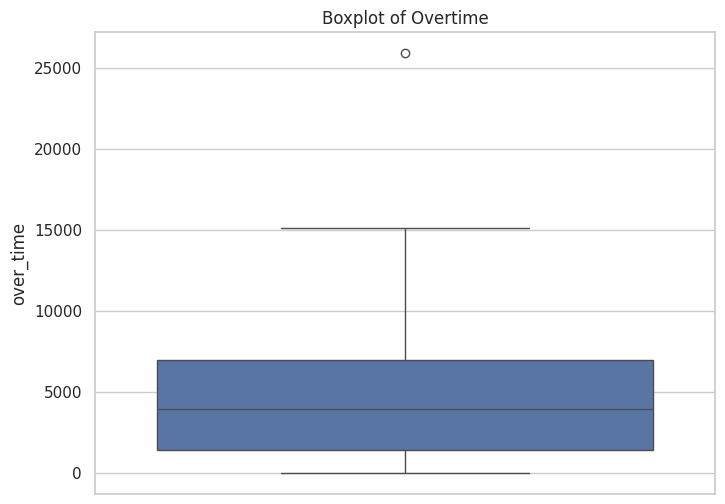

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(y='over_time', data=df_selected)
plt.title('Boxplot of Overtime')
plt.show()

*Most teams have overtime between 2500 and 8000 minutes. There is one extreme outlier, which suggests that overtime management might require special attention in some isolated cases.*

# Data Cleaning

### Convert 'date' column to datetime format

In [19]:
df['date'] = pd.to_datetime(df['date'])

### Handling inconsistencies in `department` column

In [20]:
df['department'].value_counts().index.to_list()

df['department'] = df['department'].apply(lambda x: 'finishing' if x in ['finishing ', 'finishing'] else 'sewing')

df['department'].value_counts().index.to_list()

['sewing', 'finishing']

### Handling missing values

In [21]:
# Missing 'wip' values indicate no work in progress (fill with 0.0) -- no items are unfinished
df['wip'] = df['wip'].fillna(value=0.0)

In [22]:
df.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,0
over_time,0
incentive,0


*No more missing data.*

### Handling Outliers

In [23]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [24]:
# Remove outliers from 'over_time'
df_cleaned = remove_outliers_iqr(df, 'over_time')

# Feature Engineering

### Introducing Interaction terms

In [25]:
df_cleaned['workers_smv_interaction'] = df_cleaned['no_of_workers'] * df_cleaned['smv']

df_cleaned['productivity_per_worker'] = df_cleaned['targeted_productivity'] / df['no_of_workers']

df_cleaned['smv_normalized'] = (df_cleaned['smv'] - df_cleaned['smv'].mean()) / df_cleaned['smv'].std()

df_cleaned['idle_time_per_worker'] = df_cleaned['idle_time'] / df_cleaned['no_of_workers']

# Apply log transformation to handle skewness in 'over_time' and 'wip'
df_cleaned['over_time_log'] = np.log1p(df_cleaned['over_time'])
df_cleaned['wip_log'] = np.log1p(df_cleaned['wip'])

rows, cols = df_cleaned.shape
print(f"Number of rows: {rows}, Number of columns: {cols}")

df_cleaned.head()

Number of rows: 1196, Number of columns: 21


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,idle_men,no_of_style_change,no_of_workers,actual_productivity,workers_smv_interaction,productivity_per_worker,smv_normalized,idle_time_per_worker,over_time_log,wip_log
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,...,0,0,59.0,0.940725,1543.440,0.013559,1.013533,0.0,8.865170,7.011214
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,...,0,0,8.0,0.886500,31.520,0.093750,-1.016145,0.0,6.867974,0.000000
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,...,0,0,30.5,0.800570,348.005,0.026230,-0.333801,0.0,8.205492,6.876265
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,...,0,0,30.5,0.800570,348.005,0.026230,-0.333801,0.0,8.205492,6.876265
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,...,0,0,56.0,0.800382,1450.400,0.014286,0.989783,0.0,7.560601,7.065613


### Extract features from the date column: day of the week, month, and quarter

In [26]:
df_cleaned['day_of_week'] = df_cleaned['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['quarter'] = df_cleaned['date'].dt.quarter

# Drop 'date' column as we have extracted useful date-related features
df_cleaned = df_cleaned.drop(['date'], axis=1)

In [27]:
rows, cols = df_cleaned.shape
print(f"Number of rows: {rows}, Number of columns: {cols}")

Number of rows: 1196, Number of columns: 22


### One-Hot Encode categorical variables

In [28]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['department', 'day'], drop_first=True)

### Defining Target Variable

In [29]:
X = df_cleaned.drop(['over_time', 'over_time_log', 'wip'], axis=1)
y = df_cleaned['over_time_log']

## Dataset Splitting

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the features

In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression Model

In [32]:
lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)

lr_train_predictions = lr_model.predict(X_train_scaled)
lr_test_predictions = lr_model.predict(X_test_scaled)

lr_train_mse = mean_squared_error(y_train, lr_train_predictions)
lr_train_r2 = r2_score(y_train, lr_train_predictions)
lr_test_mse = mean_squared_error(y_test, lr_test_predictions)
lr_test_r2 = r2_score(y_test, lr_test_predictions)

print(f'Linear Regression Model (Train) - MSE: {lr_train_mse}, R2: {lr_train_r2}')
print(f'Linear Regression Model (Test) - MSE: {lr_test_mse}, R2: {lr_test_r2}')

Linear Regression Model (Train) - MSE: 1.3110925738124801, R2: 0.4397087492678292
Linear Regression Model (Test) - MSE: 2.120550654168372, R2: 0.20026905844997045


# Random Forest Regression Model

In [33]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train_scaled, y_train)

rfr_train_predictions = rf_model.predict(X_train_scaled)
rfr_test_predictions = rf_model.predict(X_test_scaled)

rfr_train_mse = mean_squared_error(y_train, rfr_train_predictions)
rfr_train_r2 = r2_score(y_train, rfr_train_predictions)
rfr_test_mse = mean_squared_error(y_test, rfr_test_predictions)
rfr_test_r2 = r2_score(y_test, rfr_test_predictions)

print(f'Random Forest Regression Model (Train) - MSE: {rfr_train_mse}, R2: {rfr_train_r2}')
print(f'Random Forest Regression Model (Test) - MSE: {rfr_test_mse}, R2: {rfr_test_r2}')

Random Forest Regression Model (Train) - MSE: 0.19183749476966697, R2: 0.9180188553968607
Random Forest Regression Model (Test) - MSE: 1.6504418120885045, R2: 0.37756290718143093


## Feature Importance Analysis by the better model

                    Feature  Importance
4                 incentive    0.300820
14                  wip_log    0.182994
9       actual_productivity    0.108483
10  workers_smv_interaction    0.105451
8             no_of_workers    0.041479
6                  idle_men    0.033202
16                    month    0.028180
11  productivity_per_worker    0.026583
1                      team    0.025226
12           smv_normalized    0.023635
13     idle_time_per_worker    0.022907
5                 idle_time    0.019978
21              day_Tuesday    0.016452
15              day_of_week    0.016224
22            day_Wednesday    0.012025
20             day_Thursday    0.011306
3                       smv    0.009271
2     targeted_productivity    0.007677
7        no_of_style_change    0.004054
17        department_sewing    0.001712
18             day_Saturday    0.001252
19               day_Sunday    0.001090
0                   quarter    0.000000


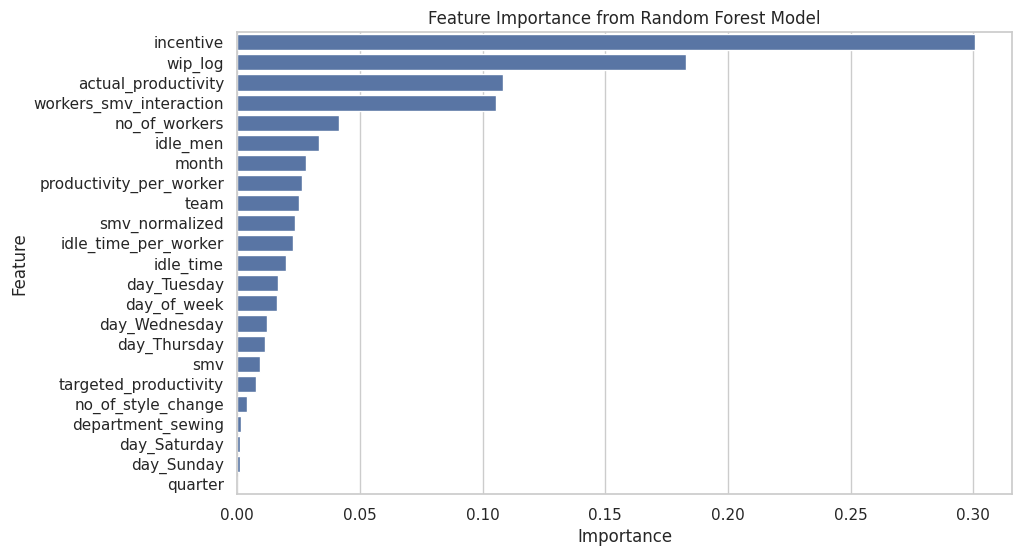

In [34]:
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.show()


# Assess Model Performance

In [38]:
def plot_model_performance(model_name, train_mse, train_r2, test_mse, test_r2):
    metrics = ['MSE', 'R²']
    train_values = [train_mse, train_r2]
    test_values = [test_mse, test_r2]

    x = np.arange(len(metrics))
    width = 0.35
    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2, train_values, width, label='Train', color='b')
    bars2 = ax.bar(x + width/2, test_values, width, label='Test', color='g')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title(f'{model_name} Model - Performance on Train and Test Sets')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    plt.tight_layout()
    plt.show()

### Plot performance for Linear Regression

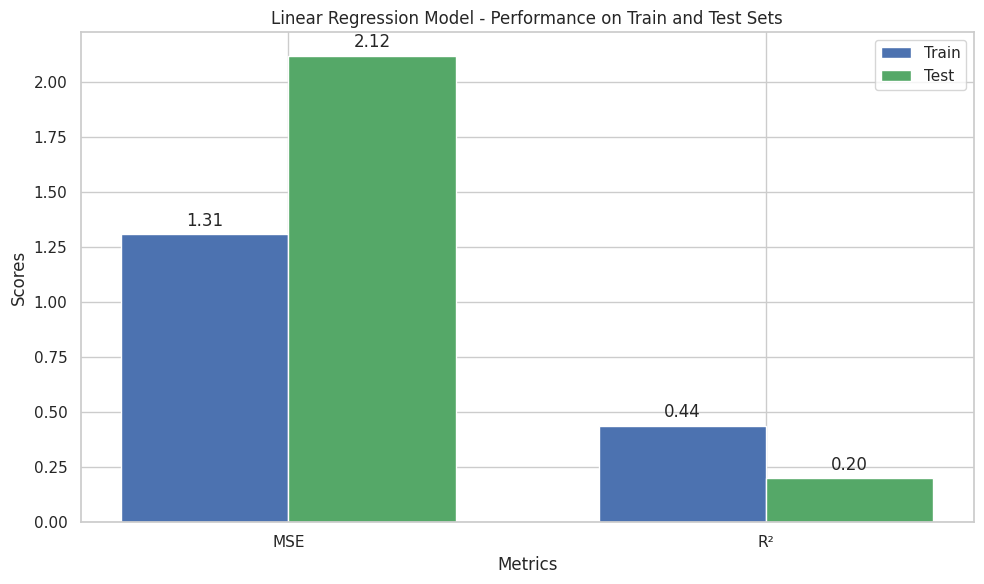

In [39]:
plot_model_performance('Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2)

### Plot performance for Random Forest

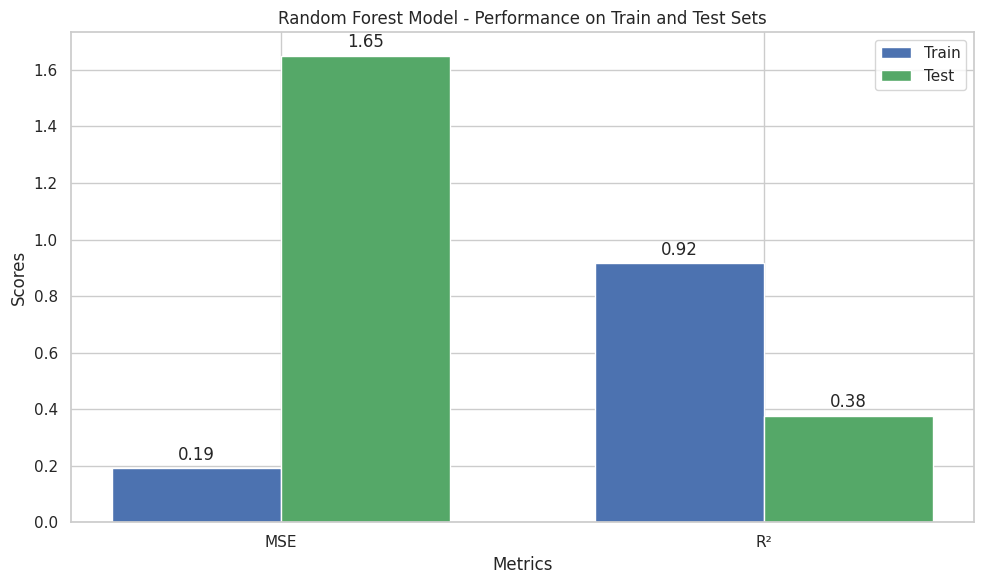

In [40]:
plot_model_performance('Random Forest', rfr_train_mse, rfr_train_r2, rfr_test_mse, rfr_test_r2)

### Analyze the performance of each model on both training and test sets

In [35]:
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.width', 1000)

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'MSE on Train': [lr_train_mse, rfr_train_mse],
    'MSE on Test': [lr_test_mse, rfr_test_mse],
    'R2 on Train': [lr_train_r2, rfr_train_r2],
    'R2 on Test': [lr_test_r2, rfr_test_r2]
})

print(results)

                      Model  MSE on Train  MSE on Test  R2 on Train  R2 on Test
0         Linear Regression      1.311093     2.120551     0.439709    0.200269
1  Random Forest Regression      0.191837     1.650442     0.918019    0.377563


## Model Performance Comparison

Model Comparison Summary:
                     Metric  Linear Regression Model  Random Forest Model
0  Mean Squared Error (MSE)                 2.120551             1.650442
1                 R-squared                 0.200269             0.377563


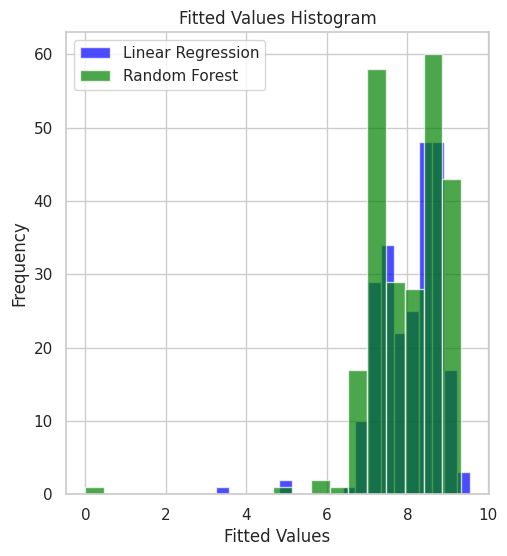

In [36]:
metrics = ['Mean Squared Error (MSE)', 'R-squared']
values_lr = [lr_test_mse, lr_test_r2]
values_rfr = [rfr_test_mse, rfr_test_r2]


summary = pd.DataFrame({
    'Metric': metrics,
    'Linear Regression Model': values_lr,
    'Random Forest Model': values_rfr
})

print("Model Comparison Summary:")
print(summary)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(lr_test_predictions, bins=20, color='blue', alpha=0.7, label='Linear Regression')
plt.hist(rfr_test_predictions, bins=20, color='green', alpha=0.7, label='Random Forest')
plt.title('Fitted Values Histogram')
plt.xlabel('Fitted Values')
plt.ylabel('Frequency')
plt.legend()